In [13]:
import wandb
import pandas as pd
import numpy as np
from scipy import stats

run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

🚀 Generating Full EDA Report
📊 NYC Airbnb Dataset
📏 Shape: 20,000 rows × 16 columns
💾 Memory usage: 8.71 MB
🔢 Numeric columns: 10
📝 Categorical columns: 6
📅 Datetime columns: 0

🔍 Missing Values Analysis
------------------------------
           Column  Missing Count  Missing %
      last_review           4123     20.615
reviews_per_month           4123     20.615
        host_name              8      0.040
             name              7      0.035


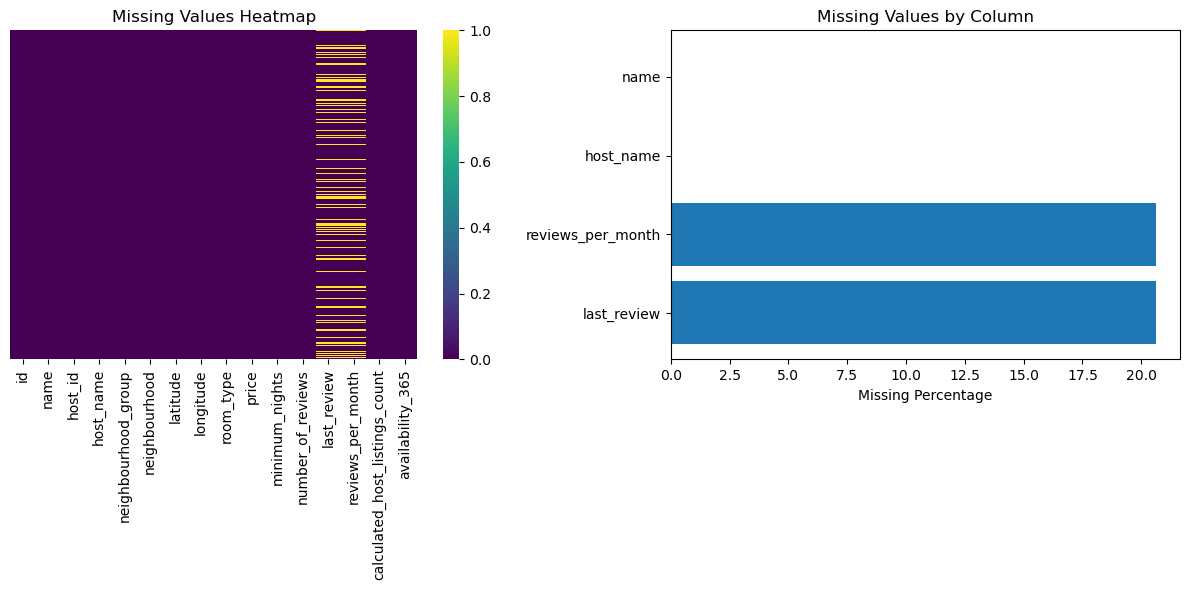


📋 Data Types Summary
-------------------------
                        Column Data Type  Unique Values                                                                                                                                       Sample Values
                            id     int64          20000                                                                                                                        [9138664, 31444015, 8741020]
                          name    object          19768 ['Private Lg Room 15 min to Manhattan', "TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN,NYC", 'Voted #1 Location Quintessential 1BR W Village Apt']
                       host_id     int64          17027                                                                                                                       [47594947, 8523790, 45854238]
                     host_name    object           6517                                                                                 

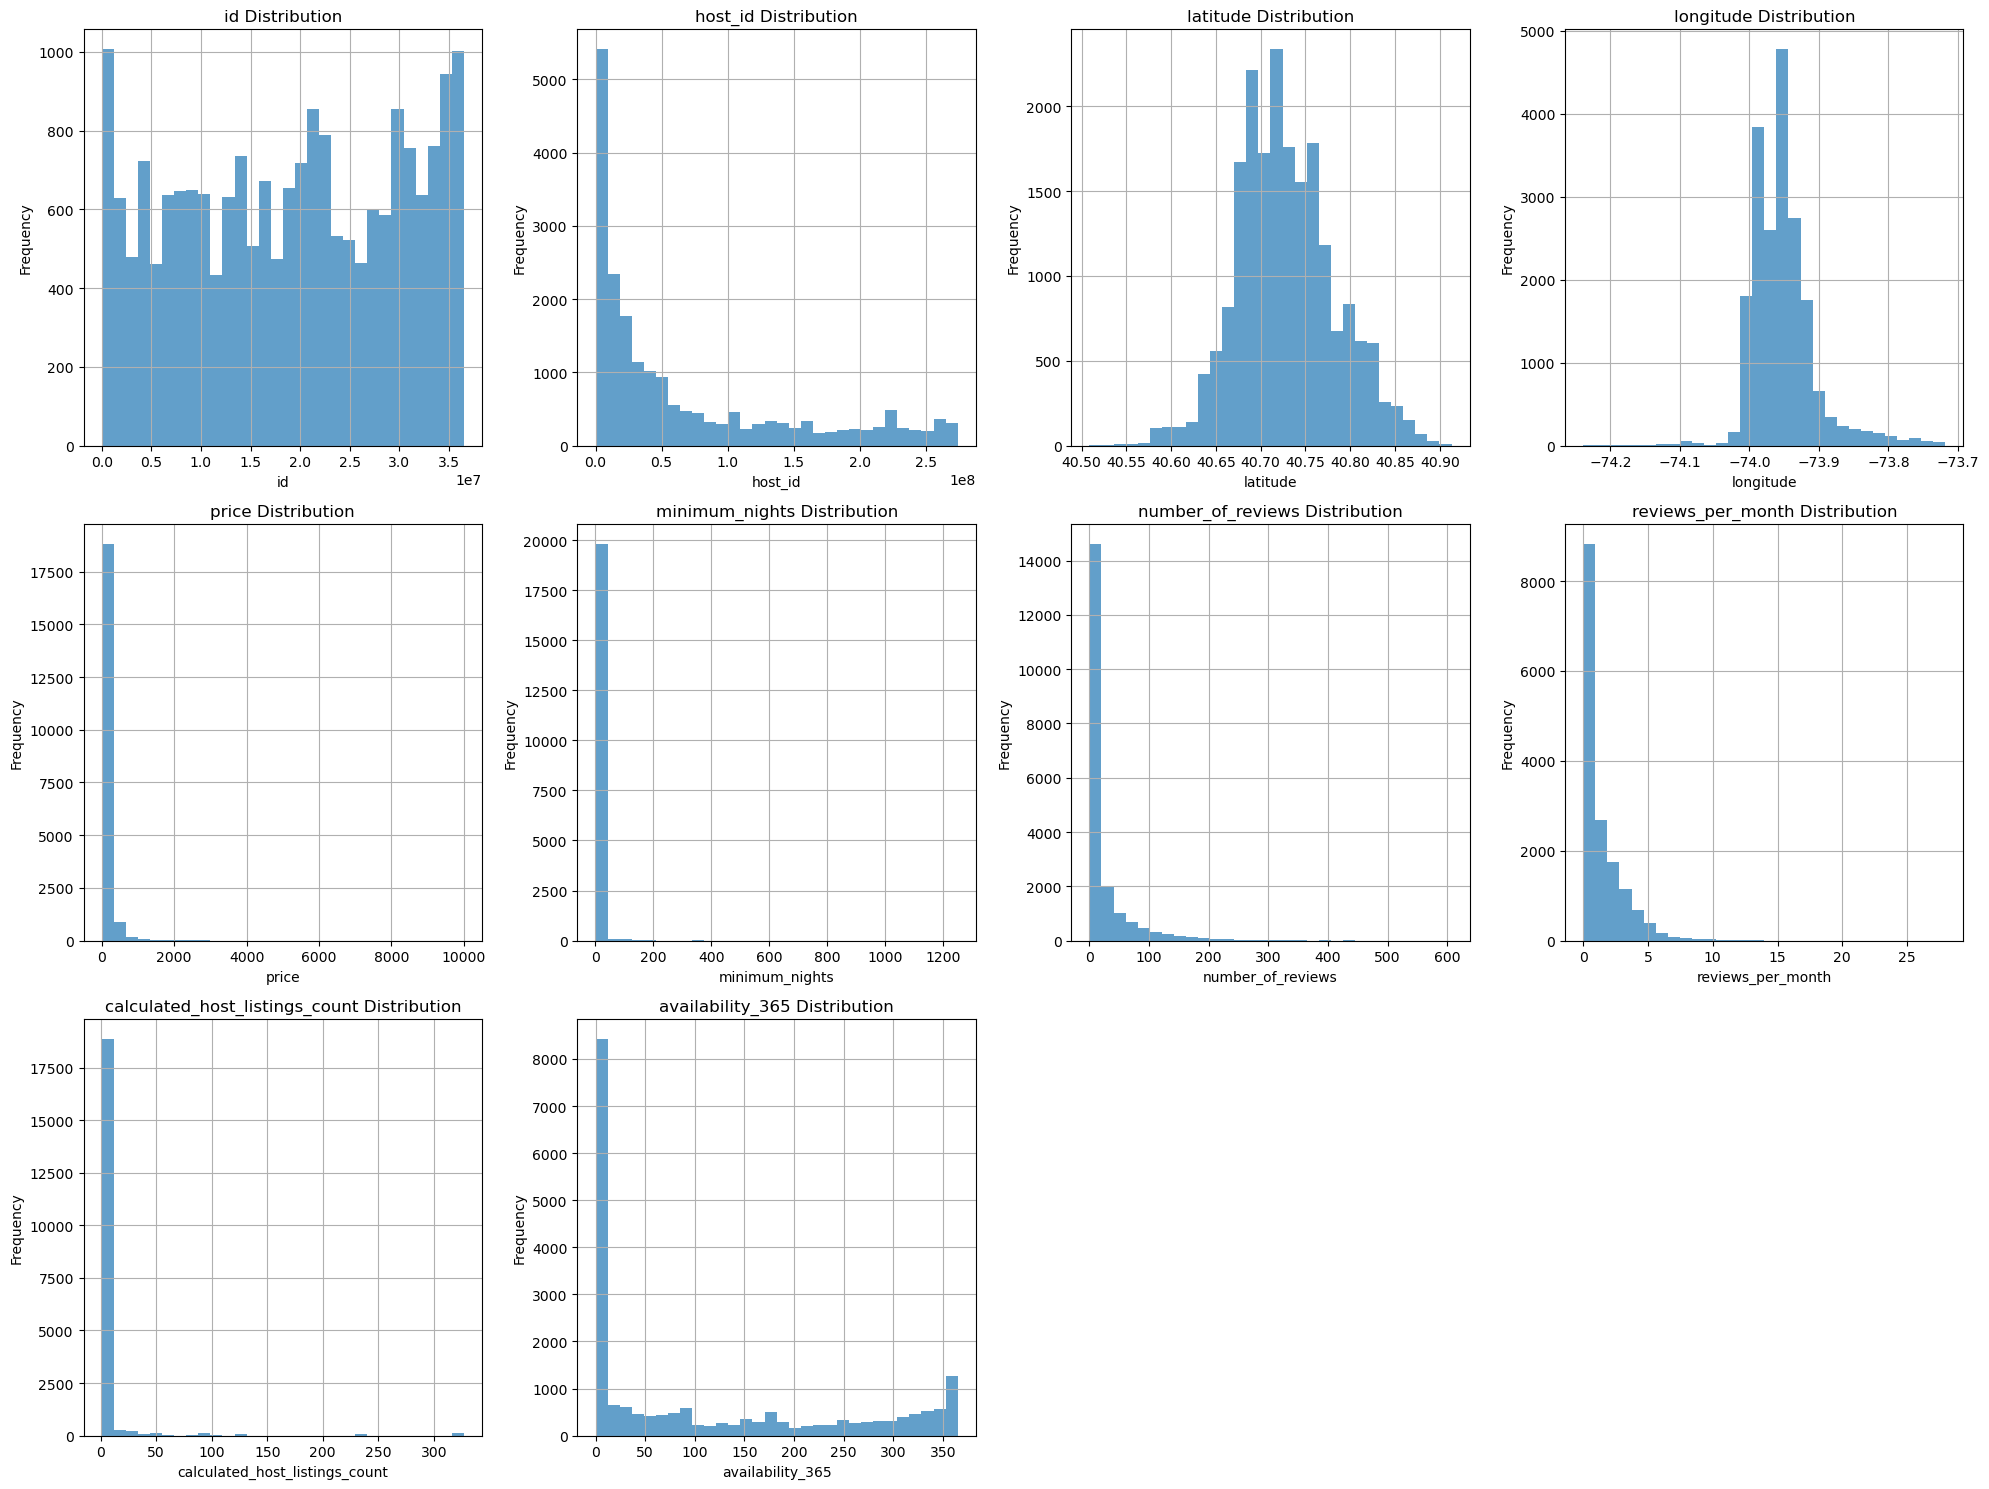


📝 Categorical Columns Analysis (6 columns)
---------------------------------------------
             Column  Unique Values      Most Frequent  Frequency
               name          19768 Brooklyn Apartment          7
          host_name           6517              David        170
neighbourhood_group              5          Manhattan       8774
      neighbourhood            217       Williamsburg       1580
          room_type              3    Entire home/apt      10384
        last_review           1507         2019-06-23        575


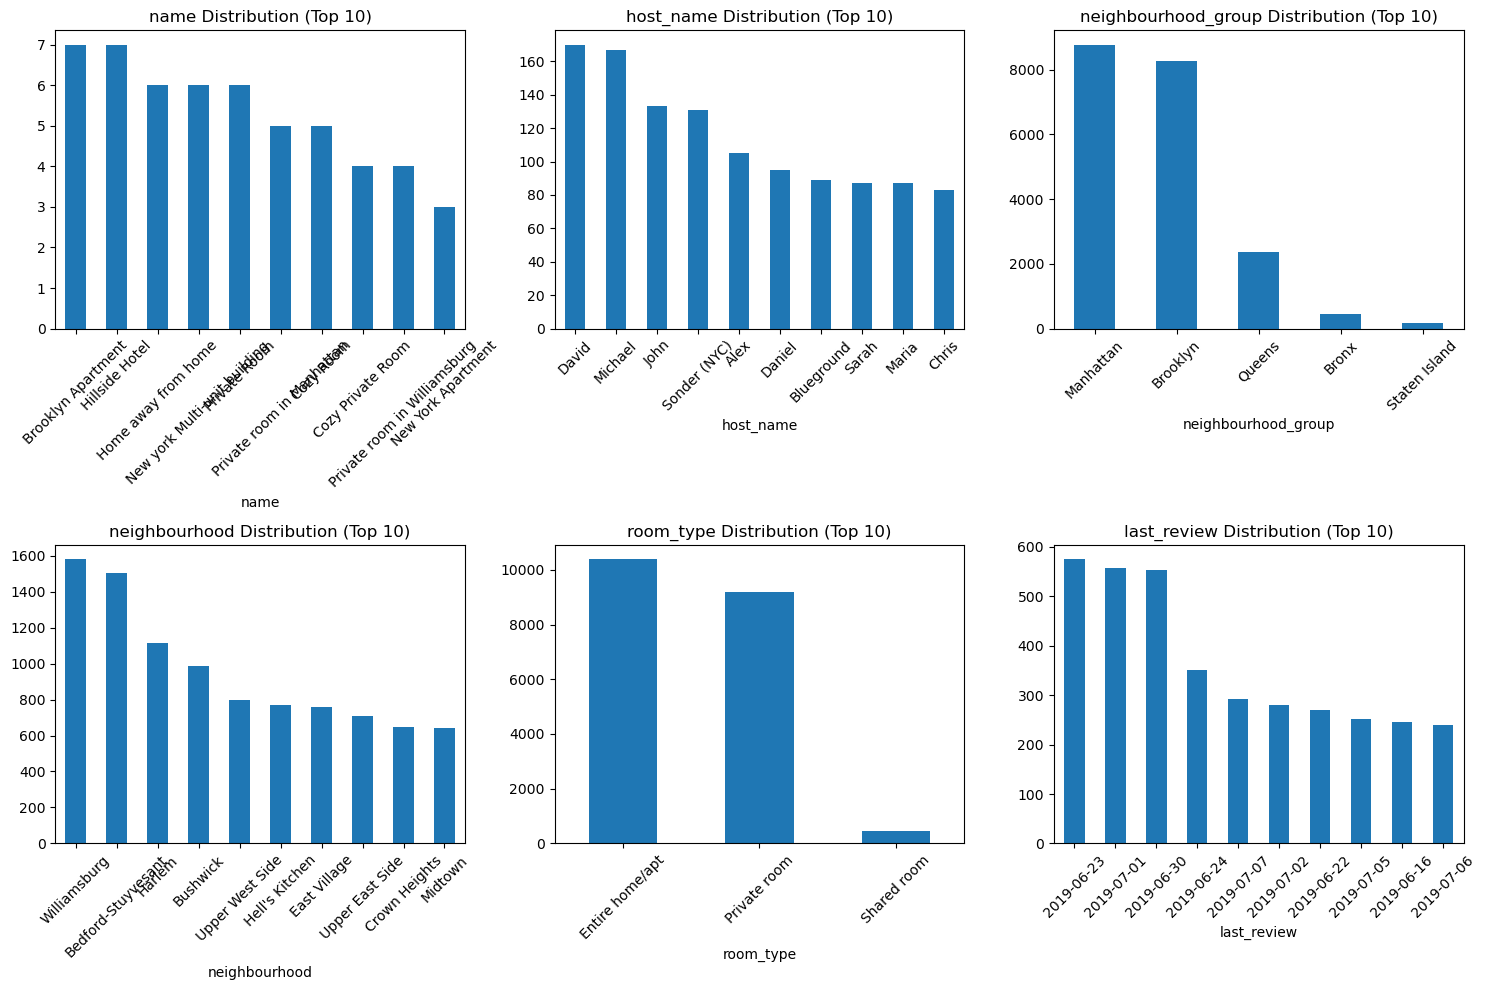


🔗 Correlation Analysis
-------------------------


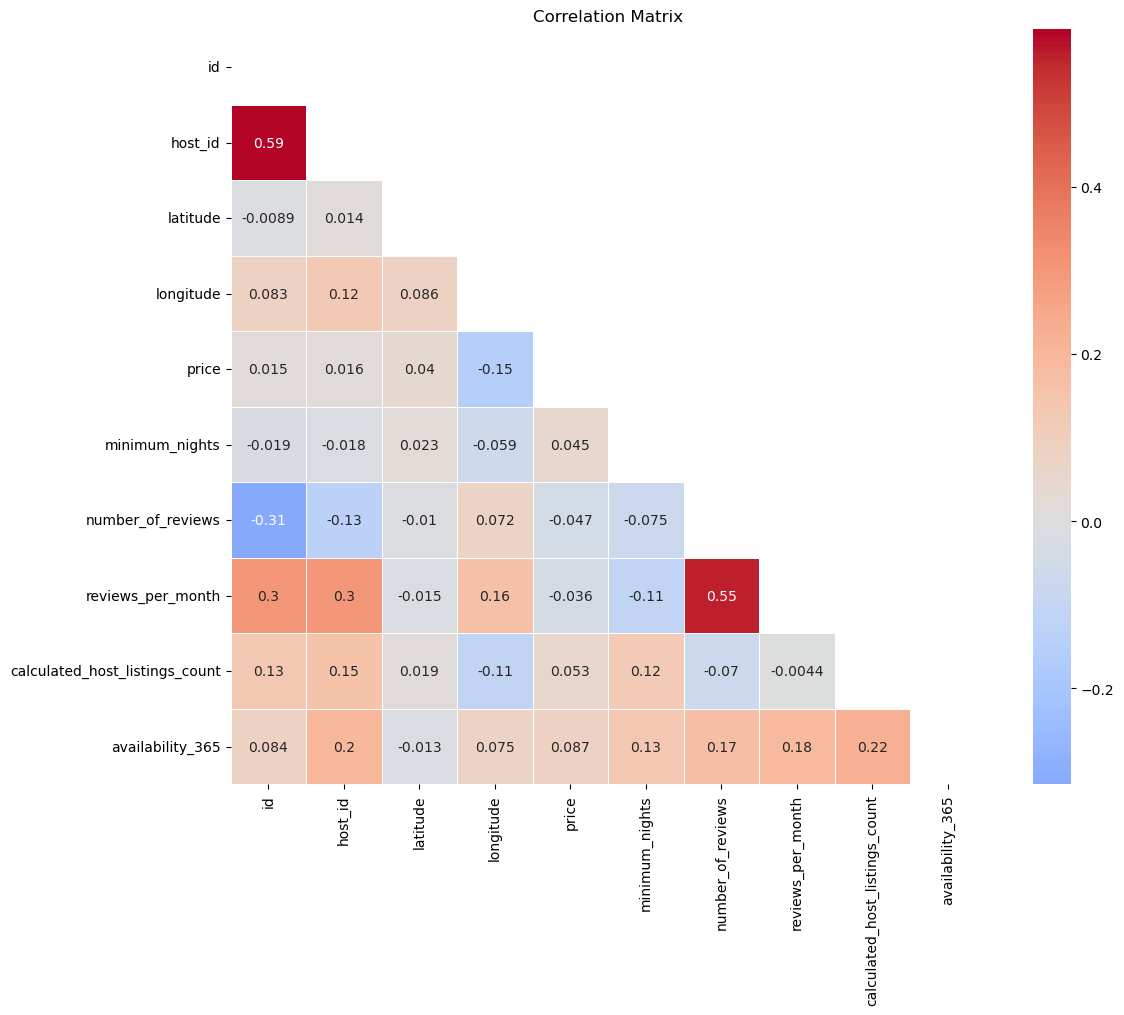


✅ No highly correlated pairs found.

🎯 Outliers Analysis
--------------------
                        Column  Outliers Count  Outliers %   Lower Bound  Upper Bound
                            id               0        0.00 -2.021019e+07  58733086.12
                       host_id             687        3.44 -1.406295e+08 255325822.62
                      latitude             161        0.80  4.058000e+01        40.87
                     longitude            1187        5.93 -7.405000e+01       -73.87
                         price            1196        5.98 -9.000000e+01       334.00
                minimum_nights            2668       13.34 -5.000000e+00        11.00
             number_of_reviews            2520       12.60 -3.200000e+01        56.00
             reviews_per_month             758        3.79 -2.540000e+00         4.74
calculated_host_listings_count            2848       14.24 -5.000000e-01         3.50
              availability_365               0        0.00 -3

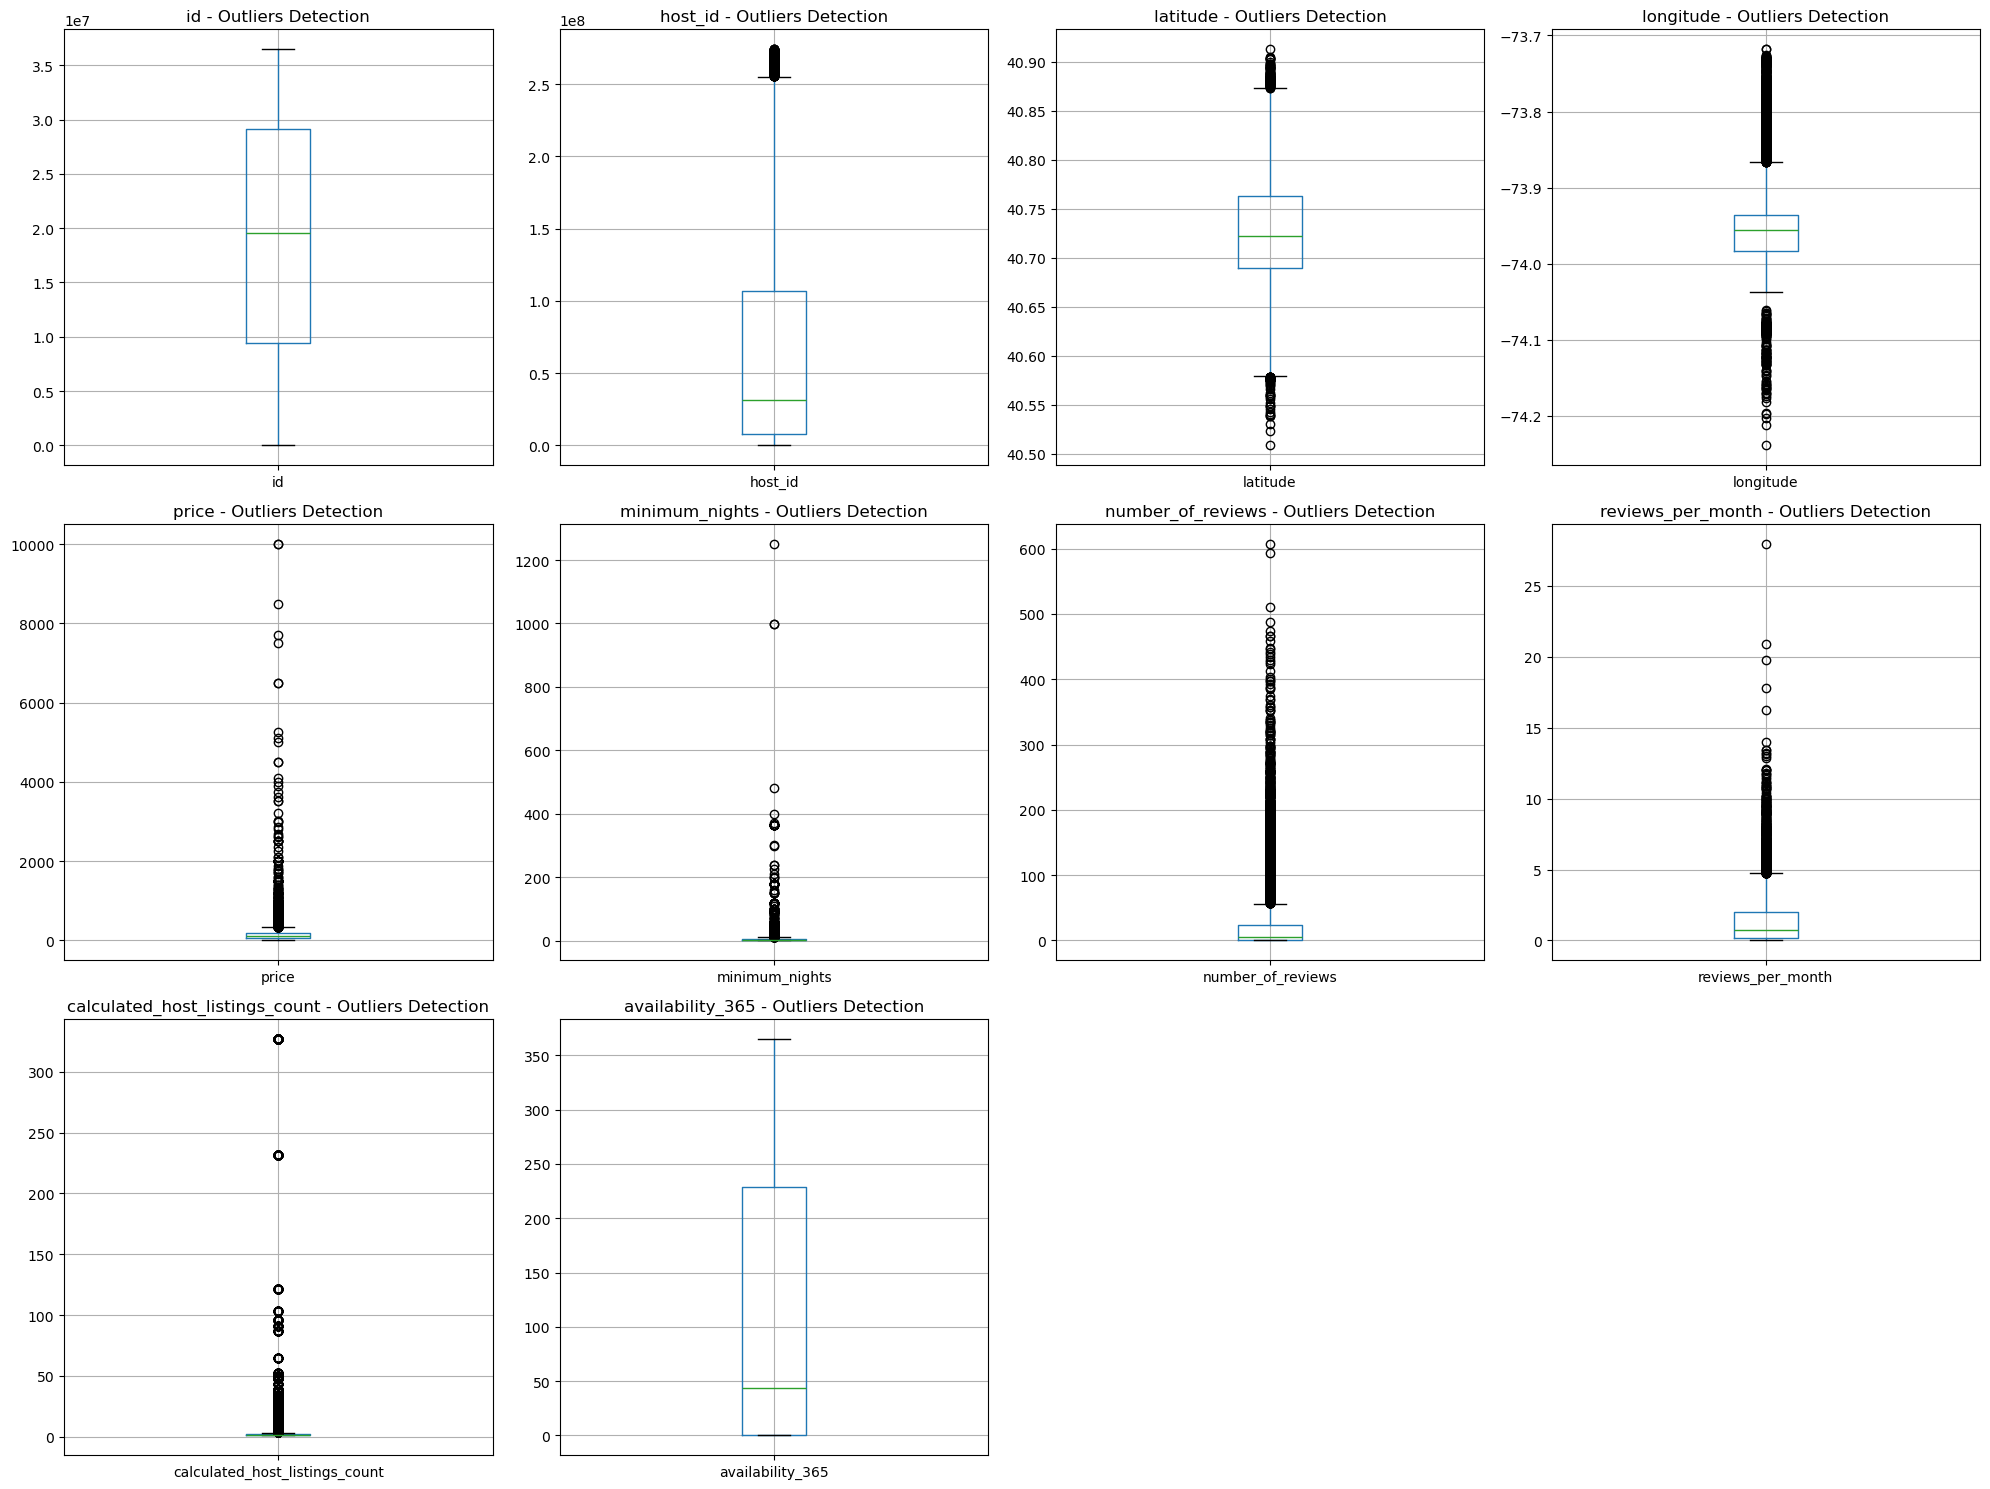


✅ EDA Report Complete!


In [14]:
# import the custom Profiler
from Profiler import Profiler

profiler = Profiler(df, "NYC Airbnb Dataset")
report = profiler.generate_full_report()


In [15]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])


In [16]:
# Create a function to filter out outliers (using z-score)
def remove_outliers_zscore(df, columns, threshold=3):
    """
    Remove outliers from specified columns using Z-score method.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        columns (str | list): Column name(s) to remove outliers from
        threshold (float): Z-score threshold for outlier detection (typically 2, 2.5, or 3). Defaults to 3.
        
    Returns:
        pd.DataFrame: DataFrame with outliers removed
        dict: Summary statistics of outliers removed
    """
    
    # Handle single column input
    if isinstance(columns, str):
        columns = [columns]
    
    df_clean = df.copy()
    removal_summary = []
    
    for col in columns:
        if col not in df.columns:
            print(f"⚠️  Column '{col}' not found in DataFrame. Skipping...")
            continue
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"⚠️  Column '{col}' is not numeric. Skipping...")
            continue
        
        original_count = len(df_clean)
        
        # Calculate Z-scores for the column (excluding NaN values)
        col_data = df_clean[col].dropna()
        z_scores = np.abs(stats.zscore(col_data))
        
        # Get indices of values within threshold
        valid_indices = col_data.index[z_scores <= threshold]
        
        # Keep only rows where this column is within threshold OR is NaN
        mask = df_clean.index.isin(valid_indices) | df_clean[col].isna()
        df_clean = df_clean[mask]
        
        outliers_removed = original_count - len(df_clean)
        removal_percentage = (outliers_removed / original_count) * 100
        
        removal_summary.append({
            'column': col,
            'original_count': original_count,
            'outliers_removed': outliers_removed,
            'remaining_count': len(df_clean),
            'removal_percentage': round(removal_percentage, 2),
            'threshold_used': threshold
        })
    
    total_removed = len(df) - len(df_clean)
    
    return df_clean, removal_summary
    

In [17]:
# Remove outliers
cols_to_be_filtered = ["minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count"]
df, summary = remove_outliers_zscore(df, cols_to_be_filtered)

# Print the summary nicely
print("\n Outlier Removal Summary:")
print("=" * 40)
for item in summary:
    for key, value in item.items():
        print(f"{key.replace('_', ' ').title()}: {value}")
    print("-" * 20)


 Outlier Removal Summary:
Column: minimum_nights
Original Count: 19001
Outliers Removed: 113
Remaining Count: 18888
Removal Percentage: 0.59
Threshold Used: 3
--------------------
Column: number_of_reviews
Original Count: 18888
Outliers Removed: 468
Remaining Count: 18420
Removal Percentage: 2.48
Threshold Used: 3
--------------------
Column: reviews_per_month
Original Count: 18420
Outliers Removed: 239
Remaining Count: 18181
Removal Percentage: 1.3
Threshold Used: 3
--------------------
Column: calculated_host_listings_count
Original Count: 18181
Outliers Removed: 265
Remaining Count: 17916
Removal Percentage: 1.46
Threshold Used: 3
--------------------


🚀 Generating Full EDA Report
📊 New NYC Airbnb Dataset
📏 Shape: 17,916 rows × 16 columns
💾 Memory usage: 7.15 MB
🔢 Numeric columns: 10
📝 Categorical columns: 5
📅 Datetime columns: 1

🔍 Missing Values Analysis
------------------------------
           Column  Missing Count  Missing %
      last_review           3549  19.809109
reviews_per_month           3549  19.809109
        host_name              8   0.044653
             name              7   0.039071


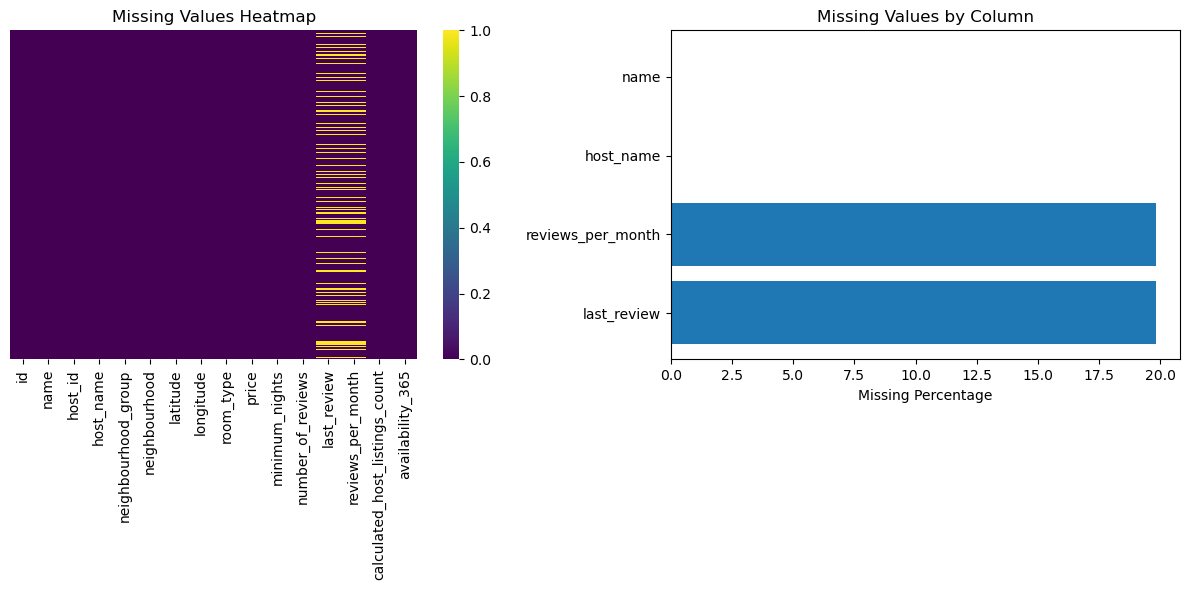


📋 Data Types Summary
-------------------------
                        Column      Data Type  Unique Values                                                                                                                                       Sample Values
                            id          int64          17916                                                                                                                        [9138664, 31444015, 8741020]
                          name         object          17702 ['Private Lg Room 15 min to Manhattan', "TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN,NYC", 'Voted #1 Location Quintessential 1BR W Village Apt']
                       host_id          int64          15608                                                                                                                       [47594947, 8523790, 45854238]
                     host_name         object           6100                                                        

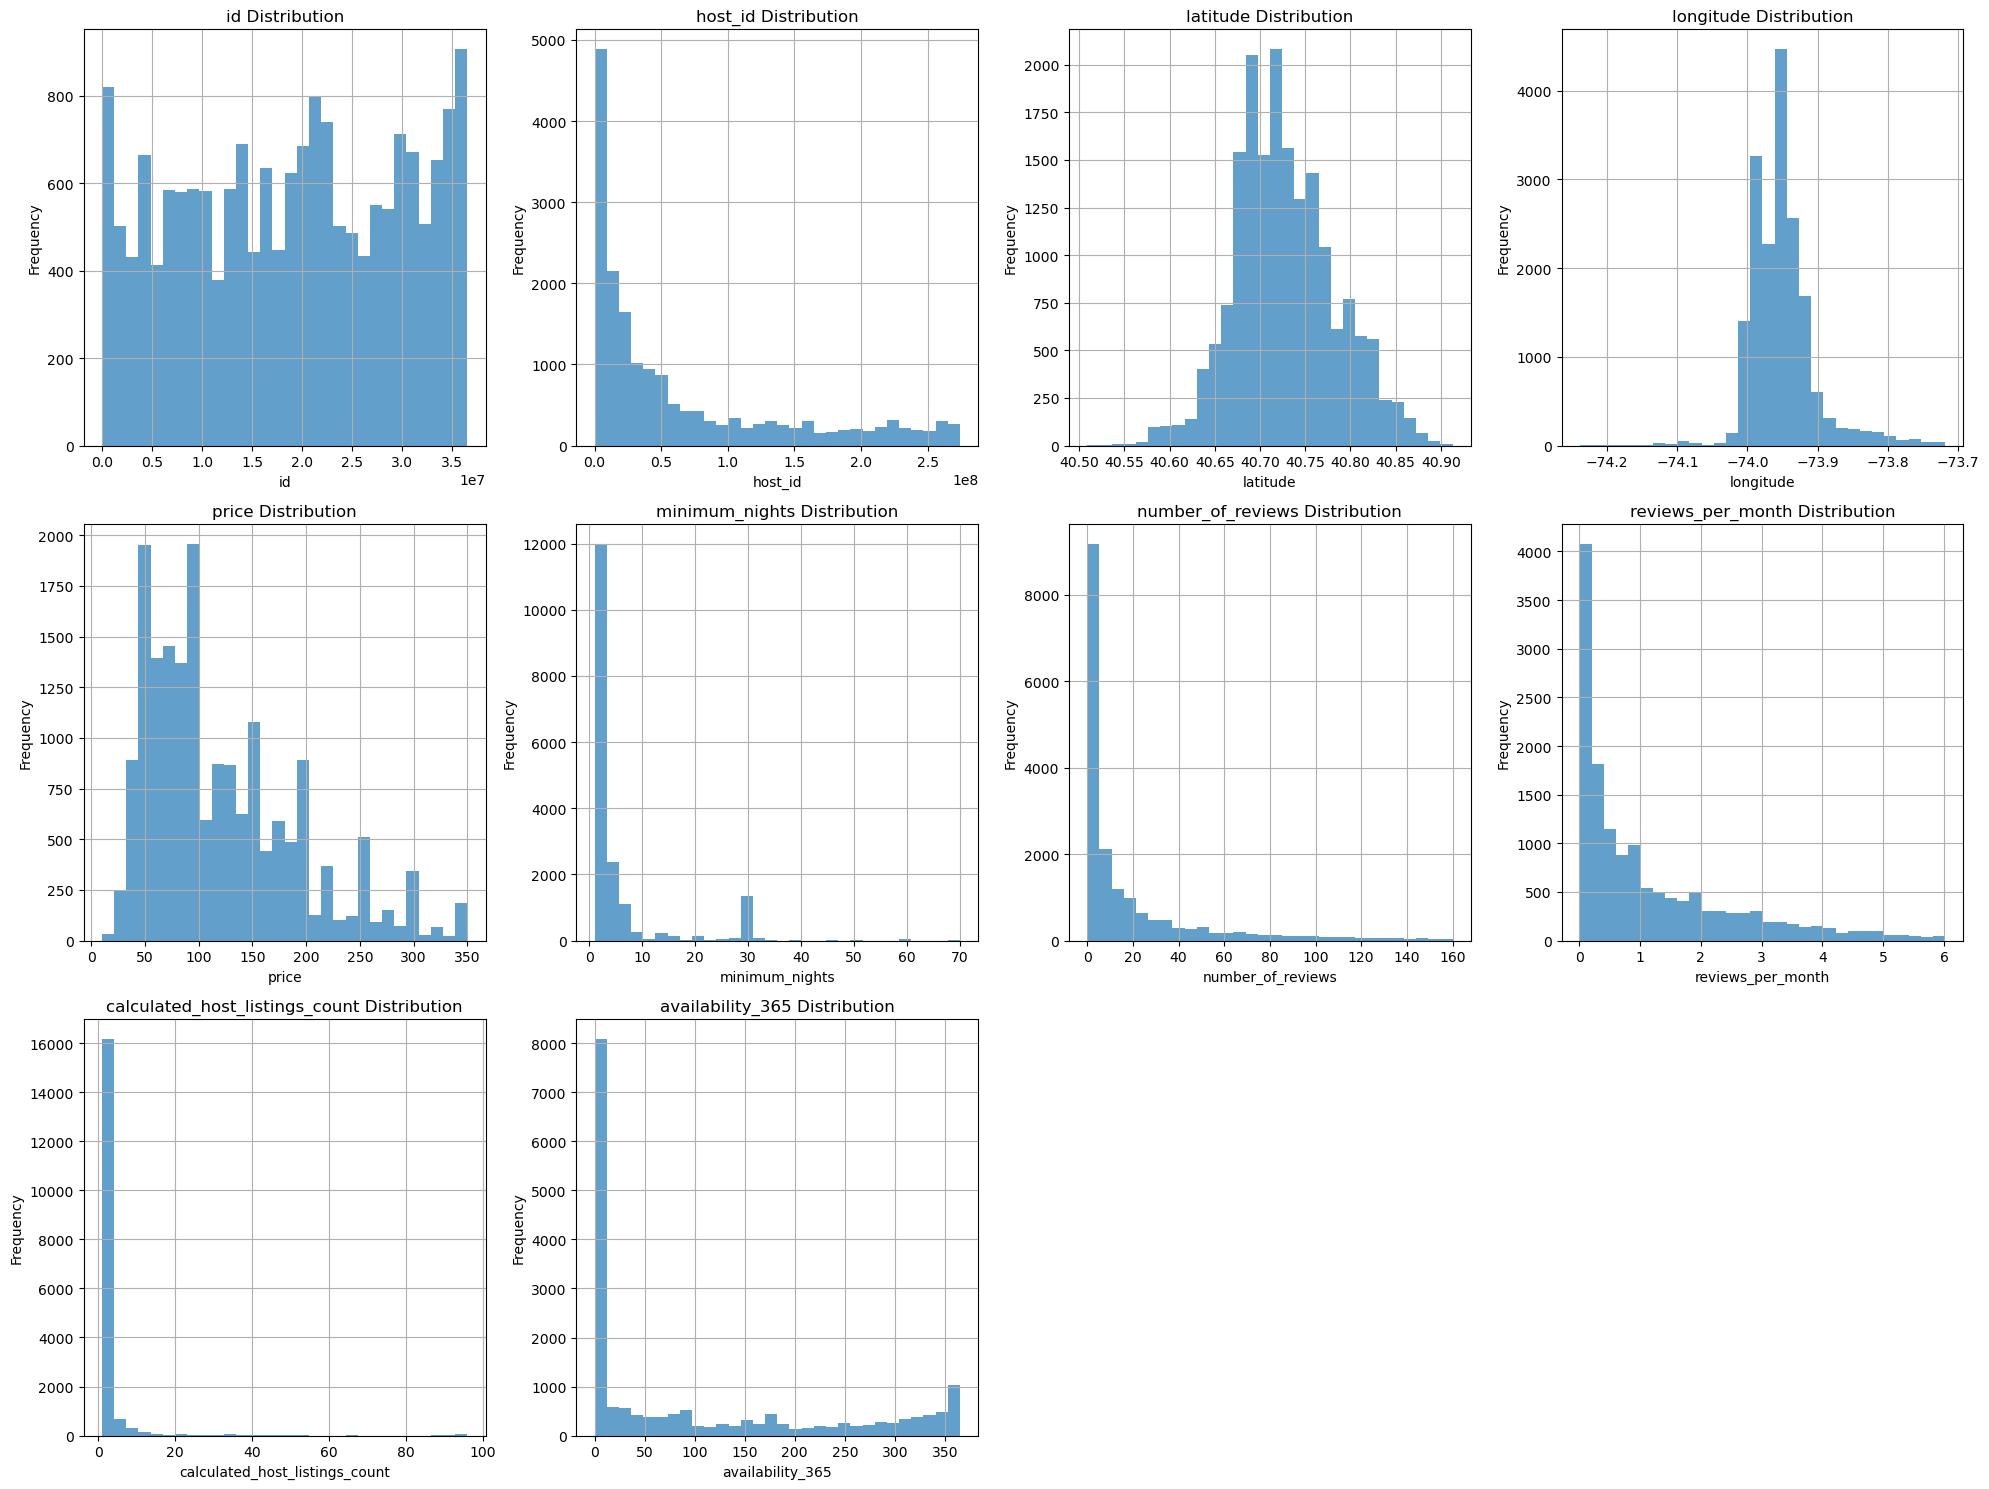


📝 Categorical Columns Analysis (5 columns)
---------------------------------------------
             Column  Unique Values      Most Frequent  Frequency
               name          17702 Brooklyn Apartment          7
          host_name           6100              David        150
neighbourhood_group              5           Brooklyn       7722
      neighbourhood            215       Williamsburg       1458
          room_type              3    Entire home/apt       8893


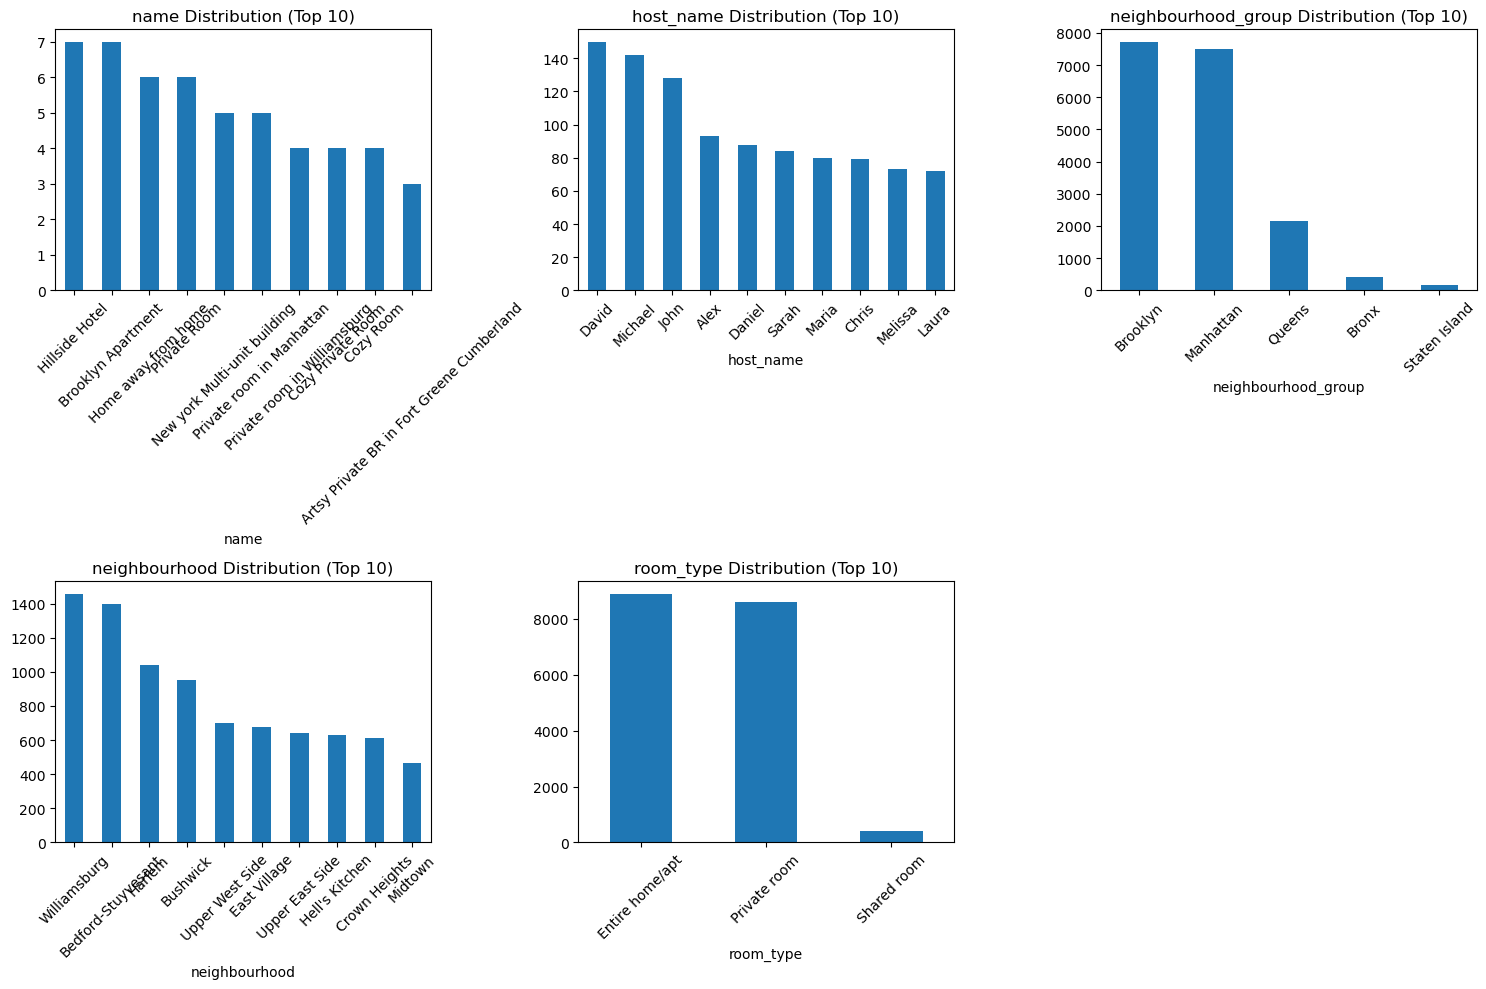


🔗 Correlation Analysis
-------------------------


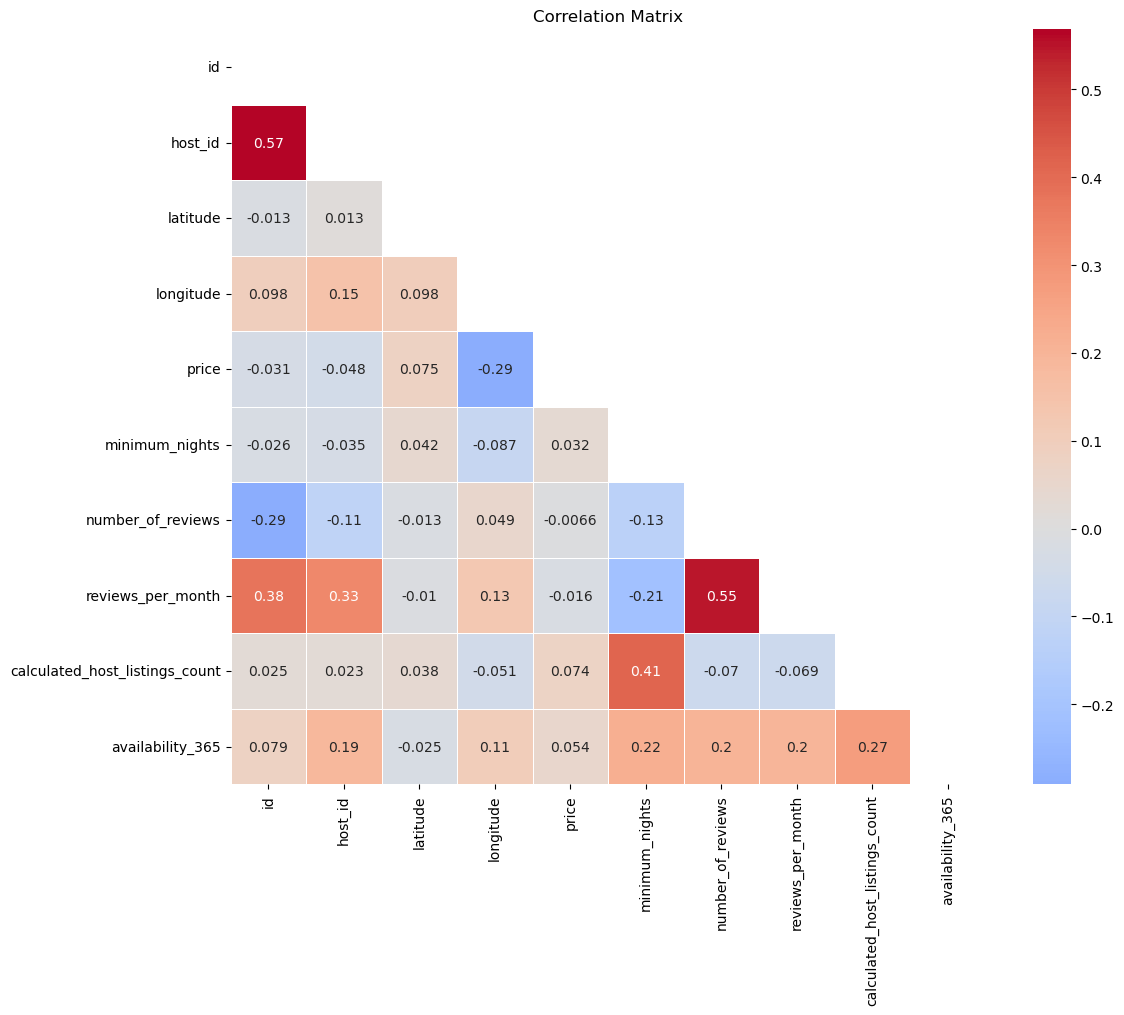


✅ No highly correlated pairs found.

🎯 Outliers Analysis
--------------------
                        Column  Outliers Count  Outliers %   Lower Bound  Upper Bound
                            id               0        0.00 -1.902329e+07  57238673.75
                       host_id             885        4.94 -1.322889e+08 241195827.88
                      latitude             115        0.64  4.058000e+01        40.88
                     longitude            1049        5.86 -7.405000e+01       -73.86
                         price             298        1.66 -7.750000e+01       302.50
                minimum_nights            2194       12.25 -5.000000e+00        11.00
             number_of_reviews            2106       11.75 -2.900000e+01        51.00
             reviews_per_month             593        3.31 -2.260000e+00         4.26
calculated_host_listings_count            2258       12.60 -5.000000e-01         3.50
              availability_365               0        0.00 -2

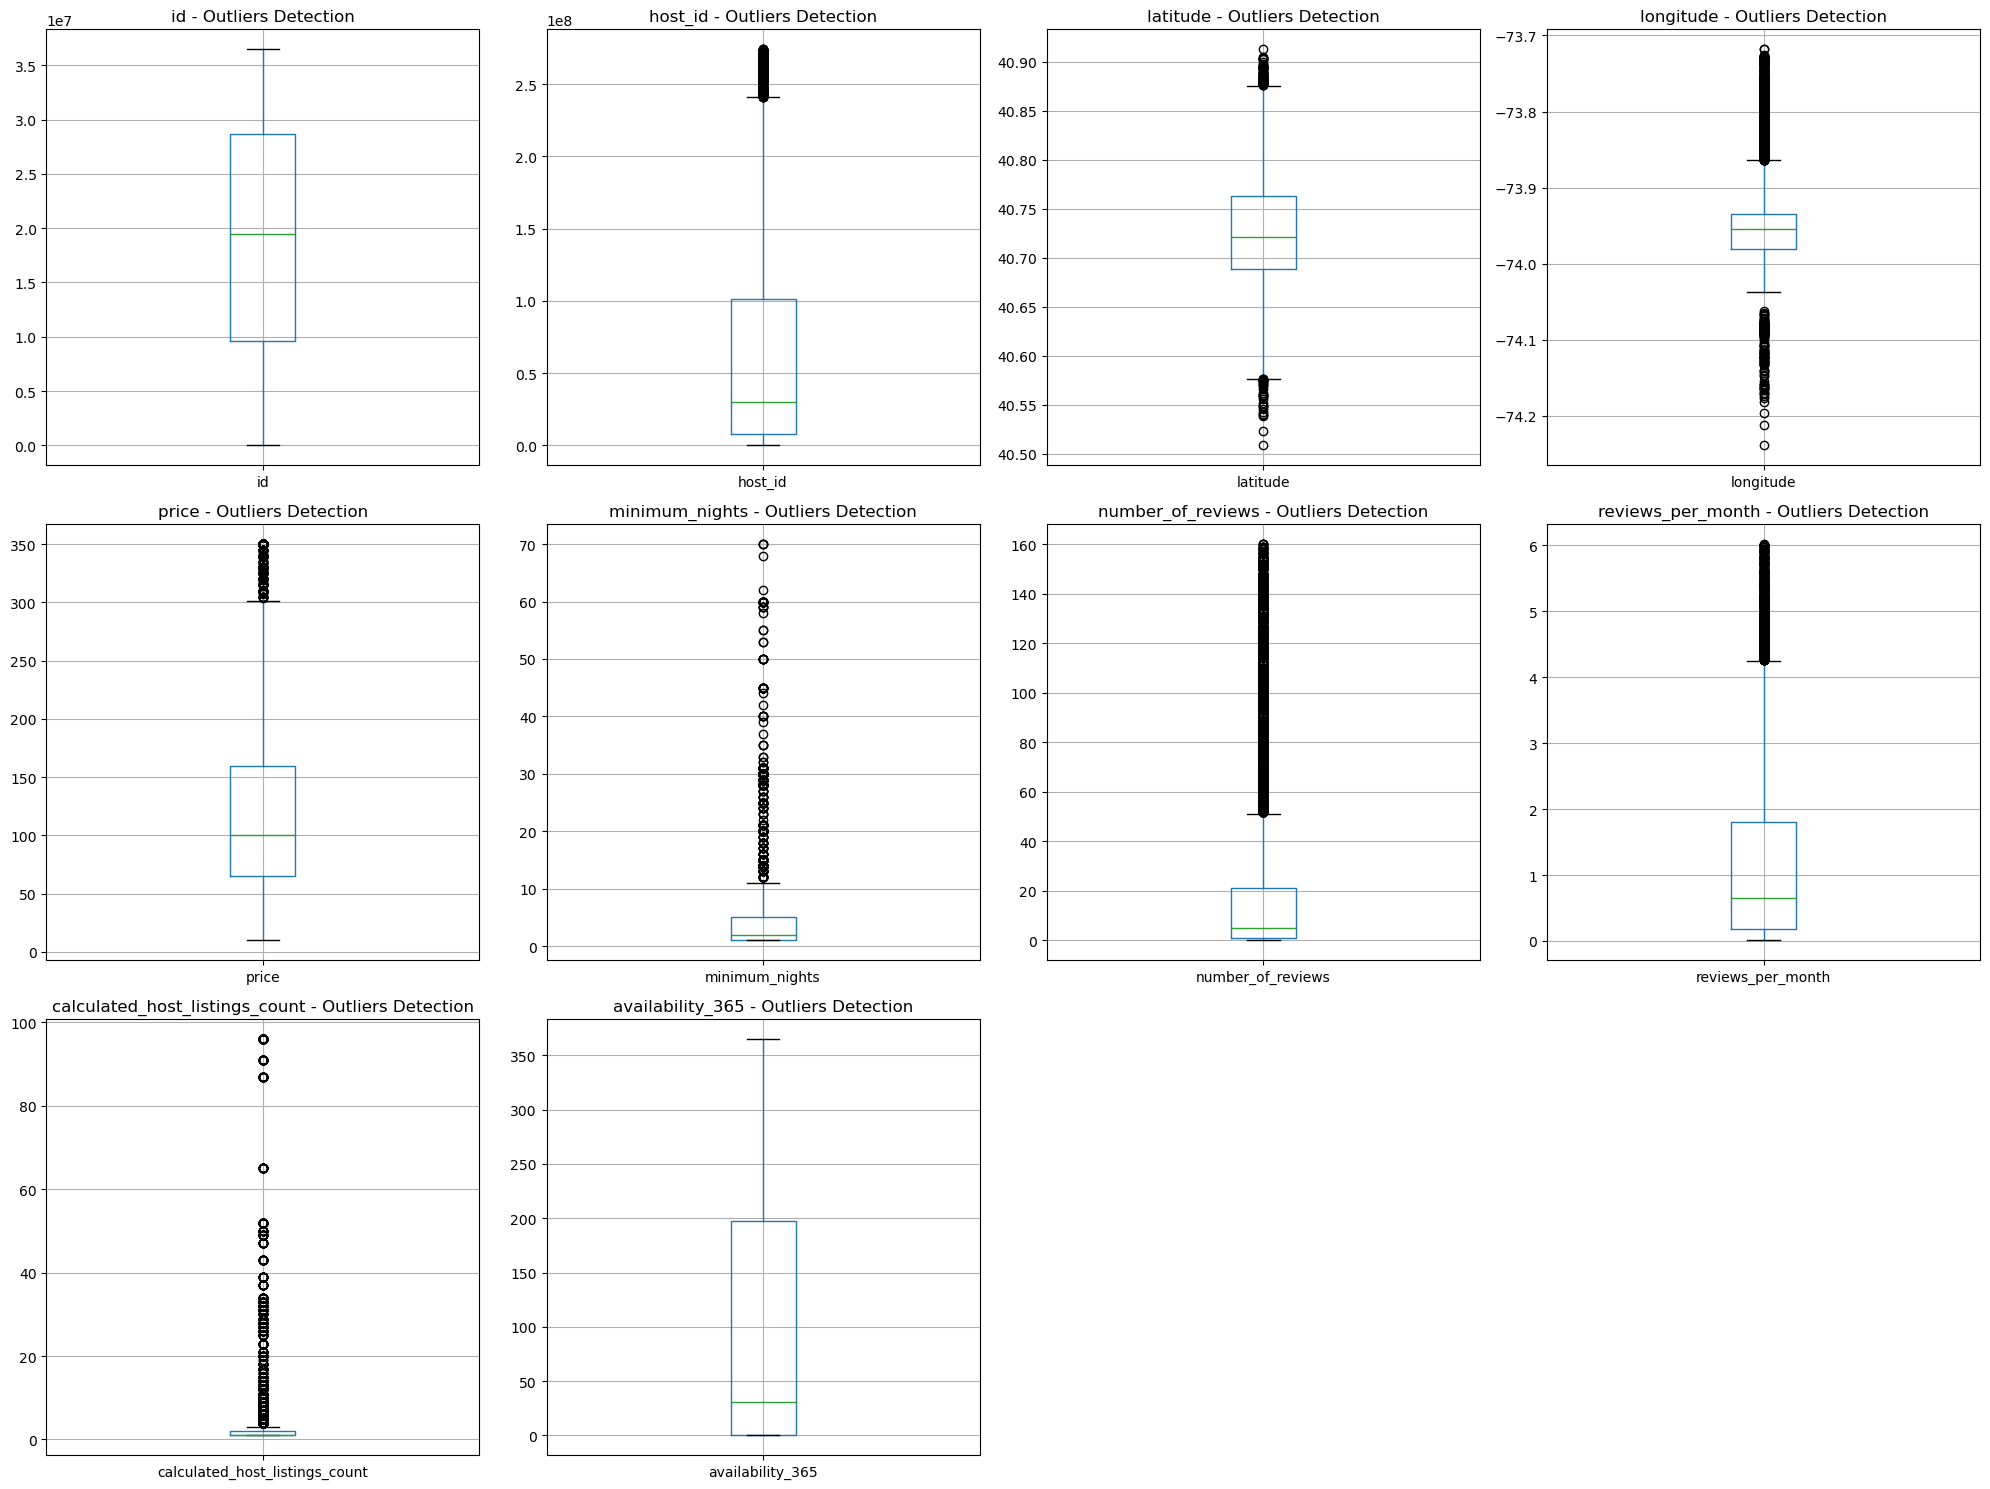


✅ EDA Report Complete!


In [18]:
# Check the modified df
new_profiler = Profiler(df, "New NYC Airbnb Dataset")
new_report = new_profiler.generate_full_report()



In [19]:
run.finish()